In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler

<b>Dataset

In [2]:
# Read the Dataset
dataset_1 = pd.read_excel("online_retail_II.xlsx" , sheet_name = "Year 2009-2010")
dataset_2 = pd.read_excel("online_retail_II.xlsx" , sheet_name = "Year 2010-2011")

In [3]:
# Concatenate the Two Dataset
dataset = pd.concat([dataset_1 , dataset_2])

# Display the Data from Dataset
dataset.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [4]:
# Display the Shape of the Dataset
print(f"The Shape of the Dataset is : {dataset.shape}")

The Shape of the Dataset is : (1067371, 8)


In [5]:
# Display the Information of Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [6]:
# Display the Summary of Numerical Data
dataset.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [7]:
# Find out the Unique Values & Counts of Country Column
dataset["Country"].value_counts()

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

<b>Dataset Preprocessing Part 1

In [10]:
# Find out the Duplicated Data
duplicatedData = dataset.duplicated().sum()
print(f"Total Duplicated Row in the Dataset is : {duplicatedData}")

Total Duplicated Row in the Dataset is : 34335


In [11]:
# Remove the Duplicated Data
dataset.drop_duplicates(inplace = True)

# Display the Shape of Dataset After Remove the Duplicated Data
print(f"The Shape of the Dataset is : {dataset.shape}")

The Shape of the Dataset is : (1033036, 8)


In [12]:
# Find out the Missing Values in the Dataset
nanValues = dataset.isnull().sum()
print(f"Total Missing Values of Each Columns is : \n{nanValues}")

Total Missing Values of Each Columns is : 
Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64


In [13]:
# Fill the Missing Values of the Dataset
dataset["Description"].fillna(method = "ffill" , inplace = True)
dataset["Customer ID"].fillna(method = "ffill" , inplace = True)

In [14]:
# Check the Missig Values After Fill the Missing Values
nanValues = dataset.isnull().sum()
print(f"Total Missing Values of Each Columns is : \n{nanValues}")

Total Missing Values of Each Columns is : 
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


<b>Dataset Visualization

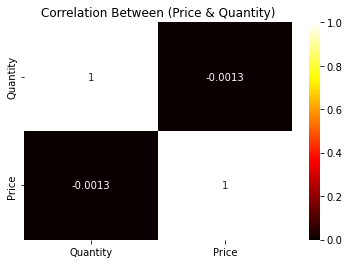

In [35]:
# Display the Correlation of Numerical Values
coorMatrix = dataset[["Quantity" , "Price"]].corr()

# Display  the Correlation Matrix with Heatmap
sns.heatmap(coorMatrix , annot = True , cmap = "hot")
plt.title("Correlation Between (Price & Quantity)")
plt.show()

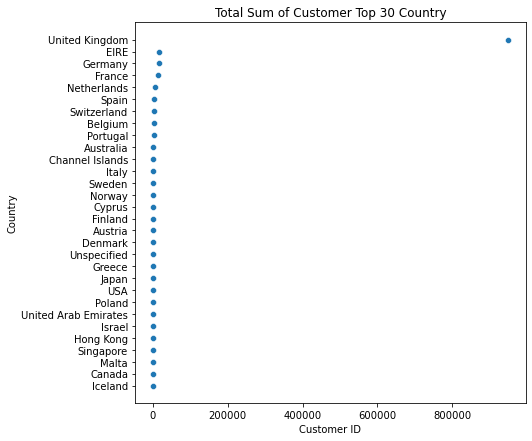

In [15]:
# Display the Total Customer in which Counrty  (which Customers are Vauable)
new_dataset = dataset.groupby("Country").count().sort_values("Customer ID" , ascending = False).head(30)

plt.figure(figsize = (7,7))
sns.scatterplot(y = new_dataset.index , x = new_dataset["Customer ID"])
plt.title("Total Sum of Customer Top 30 Country")
plt.show()

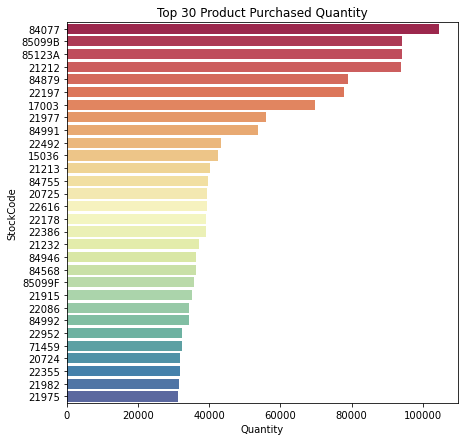

In [16]:
# Display the Each Product Quantity which has been Purchased 
new_dataset = dataset.groupby("StockCode").sum().sort_values("Quantity" , ascending = False).head(30)

plt.figure(figsize = (7,7))
sns.barplot(y = new_dataset.index , x = new_dataset["Quantity"] , palette = "Spectral")
plt.title("Top 30 Product Purchased Quantity")
plt.show()

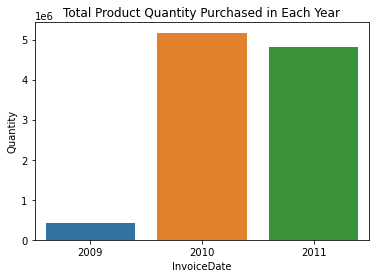

In [17]:
# Find out How many Total Product Quantity Purchased in the Each Year
new_dataset = dataset.groupby(dataset["InvoiceDate"].dt.year).sum()

sns.barplot(x = new_dataset.index , y = new_dataset["Quantity"])
plt.title("Total Product Quantity Purchased in Each Year")
plt.show()

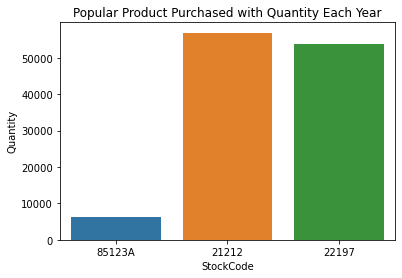

In [18]:
# Which Products are most Quantity Purchased in Each Year
year2009 = dataset[dataset["InvoiceDate"].dt.year == 2009]
year2010 = dataset[dataset["InvoiceDate"].dt.year == 2010]
year2011 = dataset[dataset["InvoiceDate"].dt.year == 2011]

year2009Product = year2009.groupby("StockCode").sum().sort_values("Quantity" , ascending = False)
year2010Product = year2010.groupby("StockCode").sum().sort_values("Quantity" , ascending = False)
year2011Product = year2011.groupby("StockCode").sum().sort_values("Quantity" , ascending = False)

#year = [2009 , 2010 , 2011]
Quantity = [year2009Product["Quantity"][year2009Product.index[0]] , year2010Product["Quantity"][year2010Product.index[0]] , year2011Product["Quantity"][year2011Product.index[0]]]
product = [year2009Product.index[0] , year2010Product.index[0] , year2011Product.index[0]]

sns.barplot(y=Quantity , x= product)
plt.xlabel("StockCode")
plt.ylabel("Quantity")
plt.title("Popular Product Purchased with Quantity Each Year")    
plt.show()

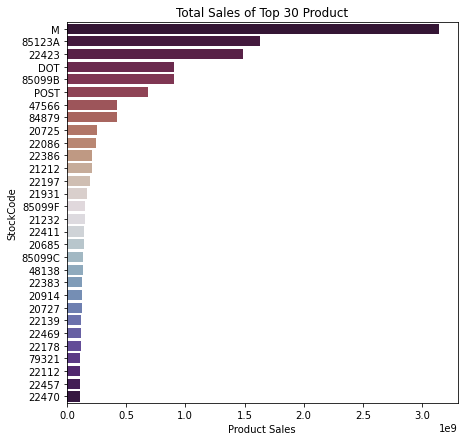

In [19]:
# Find out the Total Sales of Each Product
new_dataset = dataset.groupby("StockCode").sum()
new_dataset["Product Sales"] = new_dataset["Quantity"] * new_dataset["Price"]
new_dataset = new_dataset.sort_values("Product Sales" , ascending = False).head(30)

plt.figure(figsize = (7,7))
sns.barplot(y = new_dataset.index , x = new_dataset["Product Sales"] , palette = "twilight_shifted_r")
plt.title("Total Sales of Top 30 Product")
plt.show()

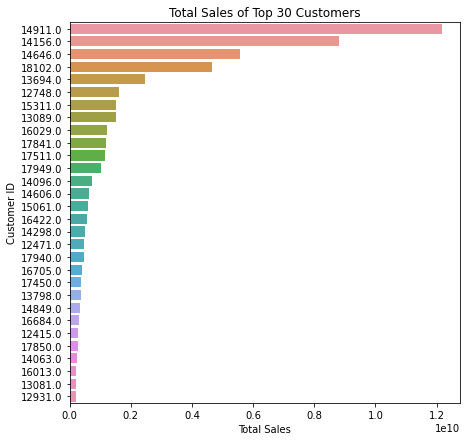

In [20]:
# Find out the Total Sales of Each Customer
new_dataset = dataset.groupby("Customer ID").sum()
new_dataset["Total Sales"] = new_dataset["Quantity"] * new_dataset["Price"]
new_dataset = new_dataset["Total Sales"].sort_values(ascending = False).head(30)
new_dataset_index = [str(data) for data in new_dataset.index]

plt.figure(figsize = (7,7))
sns.barplot(y = new_dataset_index , x = new_dataset.values)
plt.xlabel("Total Sales")
plt.ylabel("Customer ID")
plt.title("Total Sales of Top 30 Customers")
plt.show()

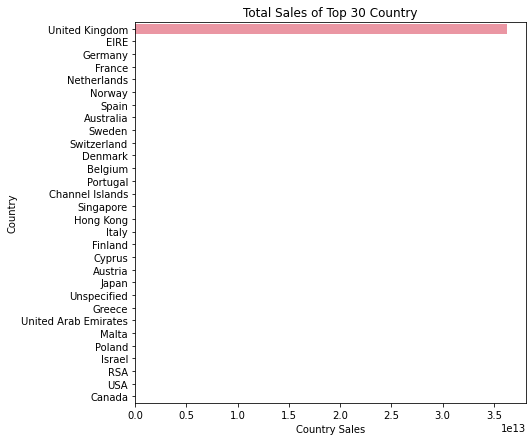

In [21]:
# Find out the Total Sales of Eact Country
new_dataset = dataset.groupby("Country").sum()
new_dataset["Country Sales"] = new_dataset["Quantity"] * new_dataset["Price"]
new_dataset = new_dataset.sort_values("Country Sales" , ascending = False).head(30)
plt.figure(figsize = (7,7))
sns.barplot(y = new_dataset.index , x = new_dataset["Country Sales"])
plt.title("Total Sales of Top 30 Country")
plt.show()

<b>Dataset Preprocessing Part 2

In [22]:
# Drop the Not Usefull Columns
dataset.drop(["Invoice" , "InvoiceDate"] , inplace = True , axis = 1)

# Change the Type of the Customer ID Column
dataset["Customer ID"] = dataset["Customer ID"].astype(str)
dataset["StockCode"] = dataset["StockCode"].astype(str)

In [23]:
# Handle the Categorical Data 
encoder = LabelEncoder()

dataset["StockCode"] = encoder.fit_transform(dataset["StockCode"])
dataset["Customer ID"] = encoder.fit_transform(dataset["Customer ID"])
dataset["Country"]   = encoder.fit_transform(dataset["Country"])

In [24]:
# Normalize the Numerical Data
normalize = MinMaxScaler()

dataset[["Quantity" , "Price"]] = normalize.fit_transform(dataset[["Quantity" , "Price"]])

# Display the Dataset After All Preprocessing
dataset.head()

,StockCode,Description,Quantity,Price,Customer ID,Country
0,4551,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0.500074,0.579071,739,40
1,3701,PINK CHERRY LIGHTS,0.500074,0.579069,739,40
2,3703,WHITE CHERRY LIGHTS,0.500074,0.579069,739,40
3,1396,"RECORD FRAME 7"" SINGLE SIZE",0.500296,0.579018,739,40
4,711,STRAWBERRY CERAMIC TRINKET BOX,0.500148,0.579009,739,40


<b>If You handle the Description Feature than You'll be import the NLP Modules like (nltk , spacy) Because Description is a sentence to Describe the Product 